# SciPy

Examples taken from [Scipy Lecture Notes](http://www.scipy-lectures.org)

## Loading default packages

In [1]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")
% matplotlib notebook

UsageError: Line magic function `%` not found.


In [2]:
# plot settings
plt.rcParams['figure.figsize'] = [9.5, 4.25]
plt.rcParams['figure.dpi'] = 100

## Interpolation

In [3]:
from scipy import interpolate

Create sample signal

In [4]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

Perform `linear` and `cubic` interpolation with [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)

In [5]:
linear_interp = interpolate.interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interpolate.interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

Display results

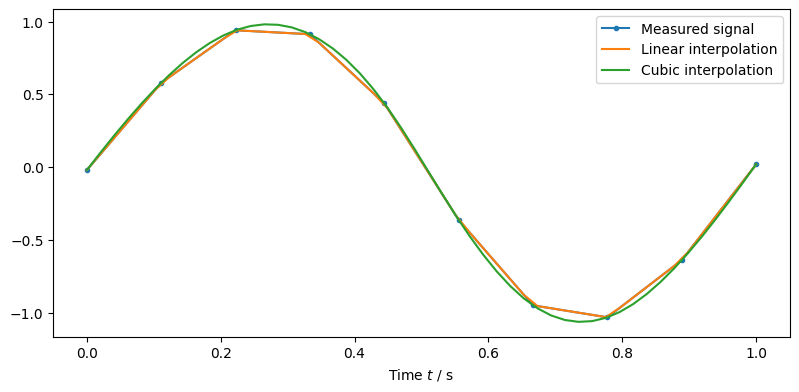

In [6]:
plt.figure()
plt.plot(measured_time, measures, '.-', label='Measured signal')
plt.plot(interpolation_time, linear_results, label='Linear interpolation')
plt.plot(interpolation_time, cubic_results, label='Cubic interpolation')
plt.xlabel('Time $t$ / s')
plt.legend()
plt.show()

## Fast Fourier transforms

In [7]:
from scipy import fftpack

Create a noisy sine signal

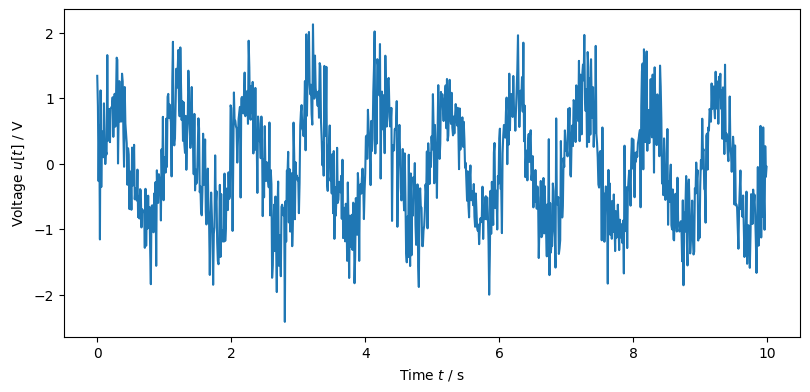

In [8]:
t = np.arange(0, 10, 0.01)
u_t = (np.sin(2 * np.pi * 1 * t) + 0.5 * np.random.randn(t.size))
plt.figure()
plt.plot(t, u_t)
plt.xlabel('Time $t$ / s')
plt.ylabel('Voltage $u[t]$ / V')
plt.show()

Compute the Fast Fourier Transformation (real part - positive frequencies)

The FFT $U[k]$ of length $N$ of the length-$N$ sequence $u[t]$ is
defined as

$$X[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k t}{N} } x[t]$$

In [9]:
U_f = fftpack.rfft(u_t)
U_f[0] /= u_t.size
U_f[1:] /= u_t.size / 2
f = fftpack.rfftfreq(u_t.size, 0.01)

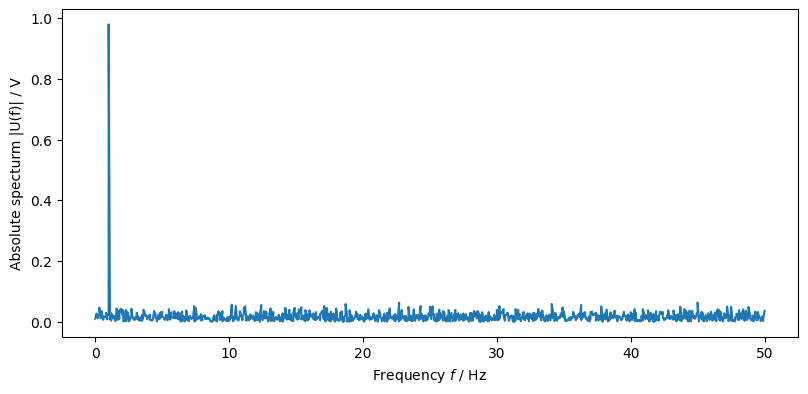

In [10]:
plt.figure()
plt.plot(f, np.abs(U_f))
plt.xlabel('Frequency $f$ / Hz')
plt.ylabel('Absolute specturm |U(f)| / V')
plt.show()

## Optimization and fit

In [11]:
from scipy import optimize

Create noisy data for a function $f(t) = a \cdot \sin\left(b \cdot t\right)$

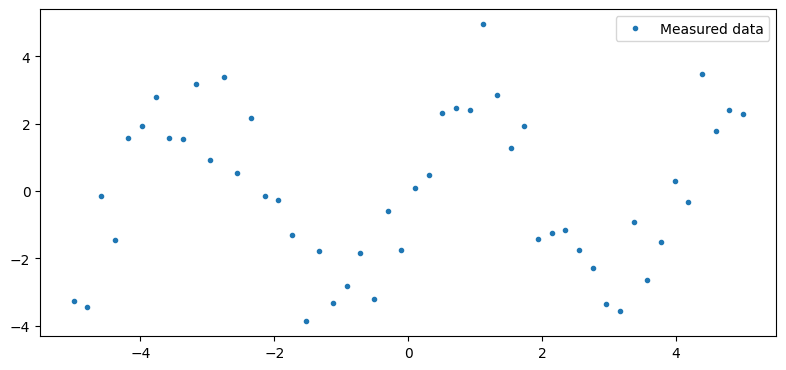

In [12]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.figure()
plt.plot(x_data, y_data, '.', label='Measured data')
plt.legend()
plt.show()

Create a prototype function for fitting and use [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [13]:
def test_func(x, a, b):
    return a * np.sin(b * x)
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
display(Markdown(f'$a$ = {params[0]}, $b$ = {params[1]}'))

$a$ = 2.8894619028034865, $b$ = 1.5177234923197693

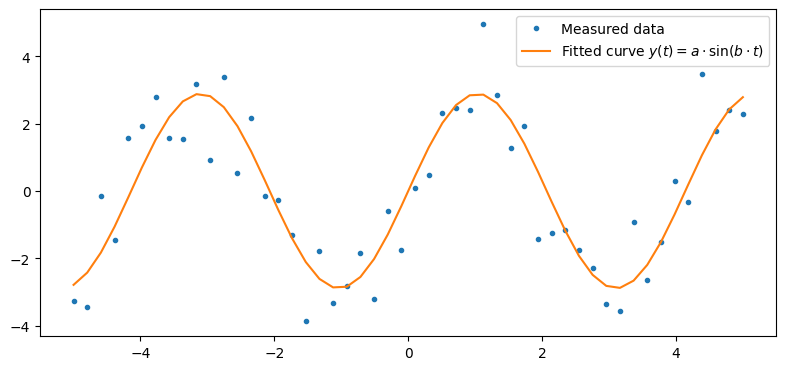

In [14]:
plt.figure()
plt.plot(x_data, y_data, '.', label='Measured data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label=r'Fitted curve $y(t) = a \cdot \sin(b \cdot t)$')
plt.legend()
plt.show()